In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data preprocessing useful function
from sklearn.preprocessing import LabelEncoder

# Data scaling
# normalization
from sklearn.preprocessing import MinMaxScaler
# standardization
from sklearn.preprocessing import StandardScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Algorithm
# SVM with linear function
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# Algorithm DecisionTree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Algorithm Logistic
from sklearn import linear_model

# Functions for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MLcourse/hw_final/Heart_without_outlier.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132.0,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141.0,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115.0,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174.0,N,0.0,Flat,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       890 non-null    float64
 4   Cholesterol     735 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           916 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         902 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 86.2+ KB


In [ ]:
df[['FastingBS']]=df[['FastingBS']].astype(str)
df[['HeartDisease']]=df[['HeartDisease']].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       890 non-null    float64
 4   Cholesterol     735 non-null    float64
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           916 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         902 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 86.2+ KB


In [ ]:
new_df=df.dropna(axis=0, how='any')
new_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132.0,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141.0,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115.0,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174.0,N,0.0,Flat,1


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             702 non-null    int64  
 1   Sex             702 non-null    object 
 2   ChestPainType   702 non-null    object 
 3   RestingBP       702 non-null    float64
 4   Cholesterol     702 non-null    float64
 5   FastingBS       702 non-null    object 
 6   RestingECG      702 non-null    object 
 7   MaxHR           702 non-null    float64
 8   ExerciseAngina  702 non-null    object 
 9   Oldpeak         702 non-null    float64
 10  ST_Slope        702 non-null    object 
 11  HeartDisease    702 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 71.3+ KB


In [ ]:
new_df.describe().round(2)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,702.00,702.00,702.00,702.00,702.00
mean,52.72,131.56,239.71,140.55,0.83
std,9.54,15.42,50.68,24.36,0.96
min,28.00,92.00,85.00,71.00,-0.10
25%,46.00,120.00,206.00,122.00,0.00
50%,54.00,130.00,235.00,140.00,0.40
75%,59.00,140.00,272.00,160.00,1.50
max,77.00,170.00,404.00,202.00,3.60


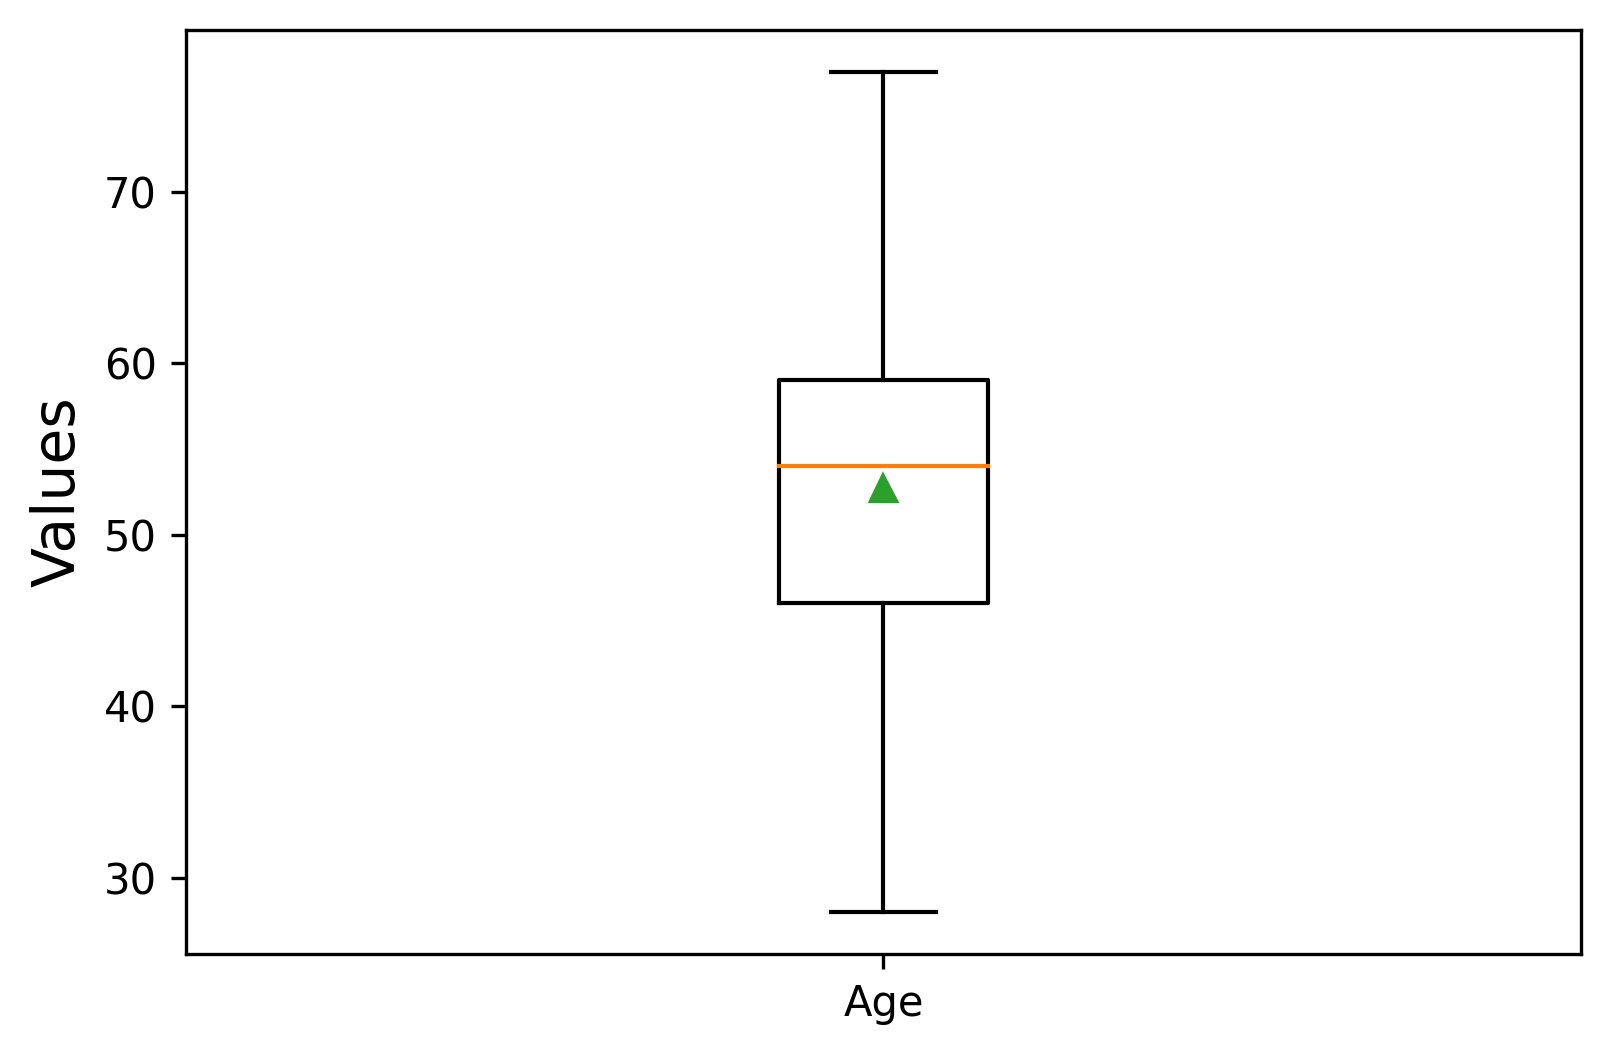

In [ ]:
plt.figure(figsize=(6,4),dpi=300)
plt.ylabel('Values',fontsize=14)
plt.boxplot(new_df['Age'],showmeans=True)
plt.xticks([1], ['Age'])
plt.show()

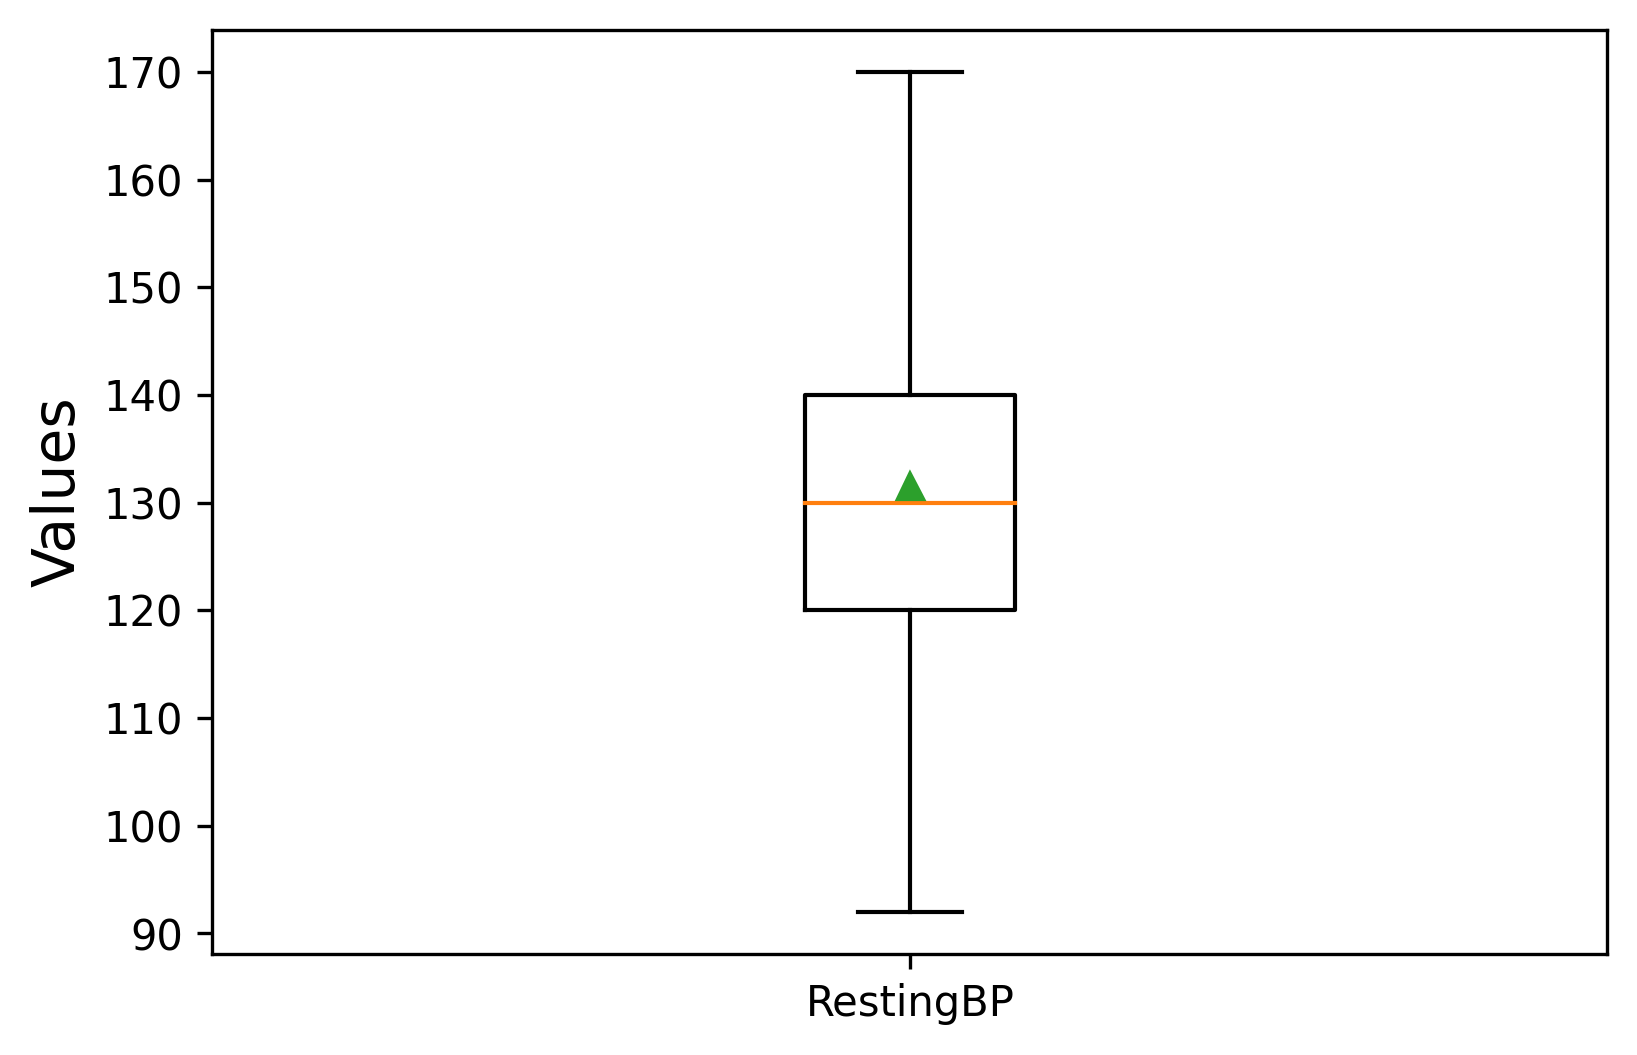

In [ ]:
#RestingBP
plt.figure(figsize=(6,4),dpi=300)
plt.ylabel('Values',fontsize=14)
plt.boxplot(new_df['RestingBP'],showmeans=True)
plt.xticks([1], ['RestingBP'])
plt.show()

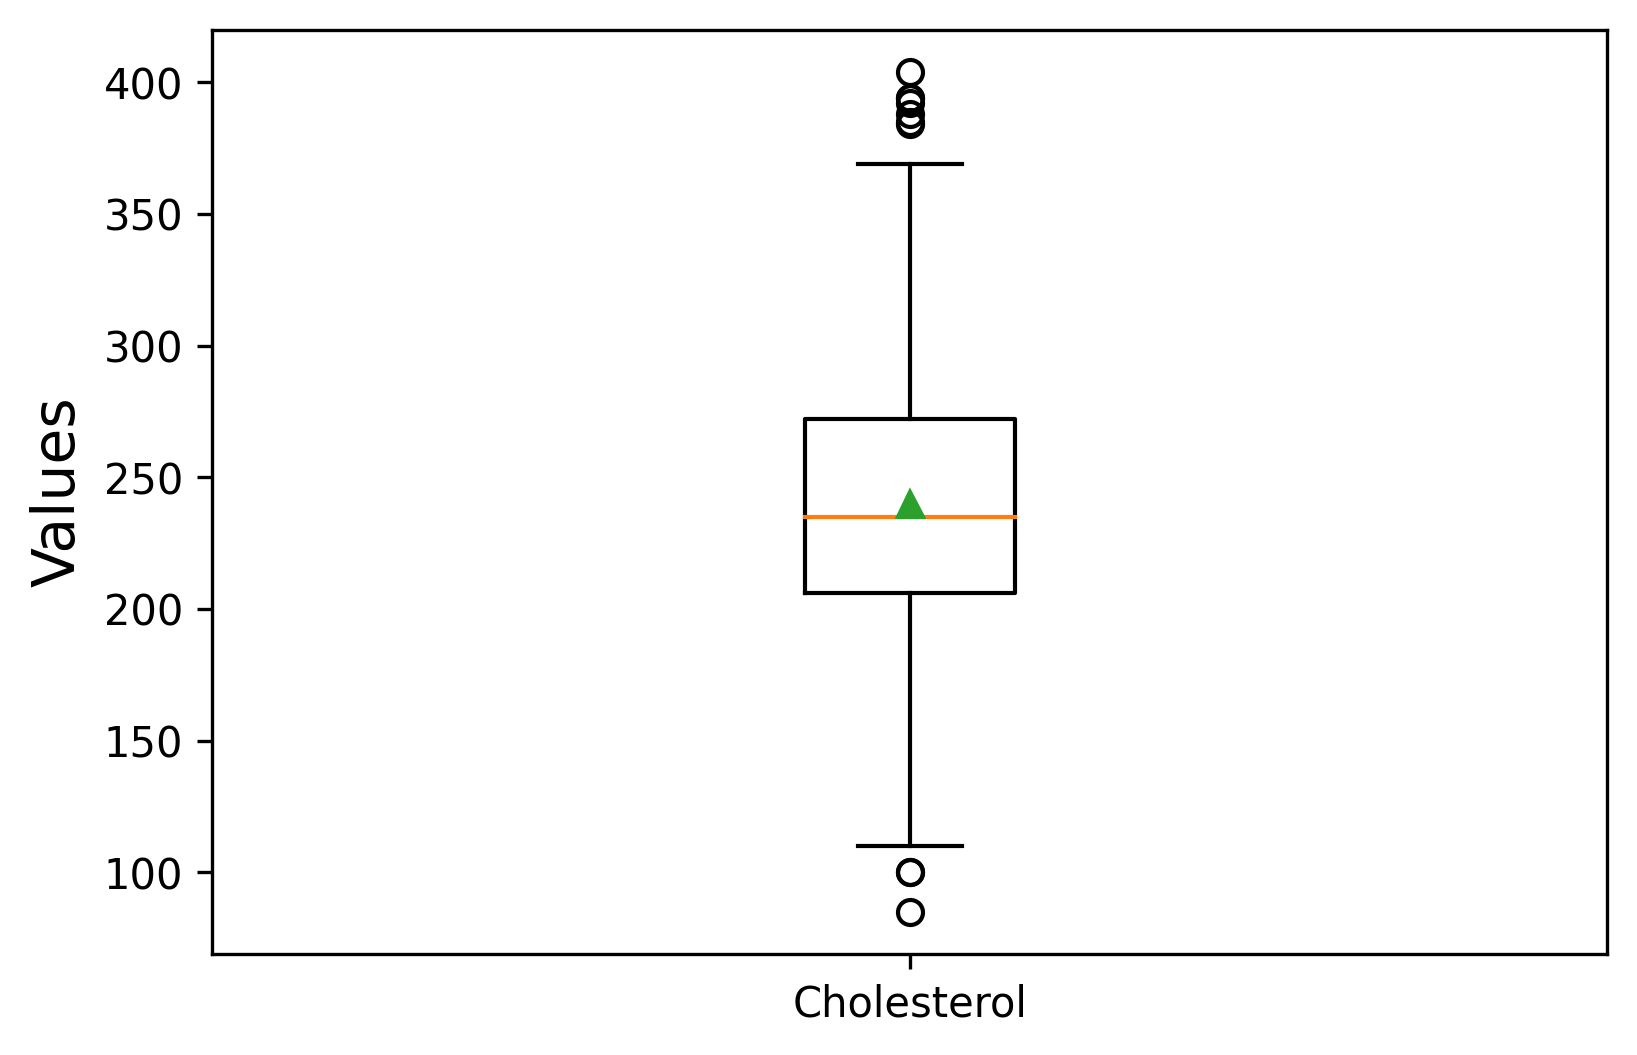

In [ ]:
#Cholesterol

plt.figure(figsize=(6,4),dpi=300)
plt.ylabel('Values',fontsize=14)
plt.boxplot(new_df['Cholesterol'],showmeans=True)
plt.xticks([1], ['Cholesterol'])
plt.show()

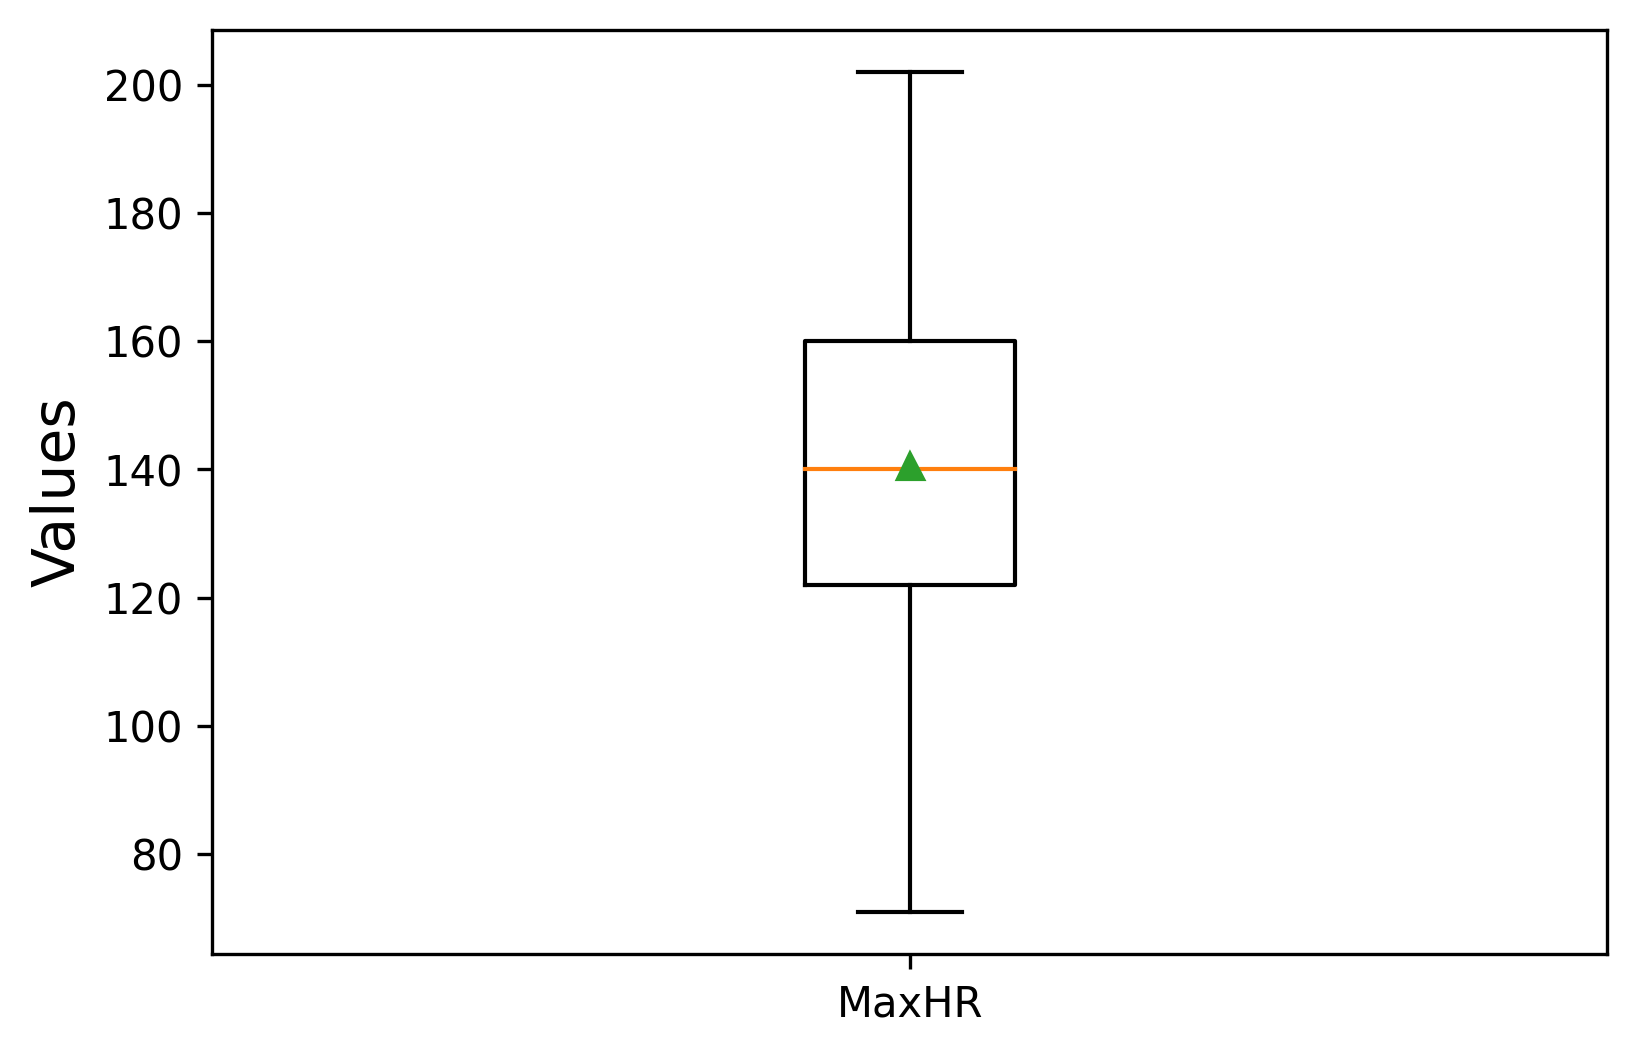

In [ ]:
#MaxHR

plt.figure(figsize=(6,4),dpi=300)
plt.ylabel('Values',fontsize=14)
plt.boxplot(new_df['MaxHR'],showmeans=True)
plt.xticks([1], ['MaxHR'])
plt.show()

In [ ]:
dummied_new_df=pd.get_dummies(new_df,columns=['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope','HeartDisease'])
dummied_new_df

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease_0,HeartDisease_1
0,40,140.0,289.0,172.0,0.0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,1,0
1,49,160.0,180.0,156.0,1.0,1,0,0,0,1,...,0,1,0,1,0,0,1,0,0,1
2,37,130.0,283.0,98.0,0.0,0,1,0,1,0,...,0,0,1,1,0,0,0,1,1,0
3,48,138.0,214.0,108.0,1.5,1,0,1,0,0,...,0,1,0,0,1,0,1,0,0,1
4,54,150.0,195.0,122.0,0.0,0,1,0,0,1,...,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,132.0,1.2,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,1
914,68,144.0,193.0,141.0,3.4,0,1,1,0,0,...,0,1,0,1,0,0,1,0,0,1
915,57,130.0,131.0,115.0,1.2,0,1,1,0,0,...,0,1,0,0,1,0,1,0,0,1
916,57,130.0,236.0,174.0,0.0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1


In [ ]:
dummied_new_df.to_csv('Heart_20221223.csv',index=False, header=True) #index(索引) header(標題)
print('Export complete...')

Export complete...


In [ ]:
dummied_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 917
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                702 non-null    int64  
 1   RestingBP          702 non-null    float64
 2   Cholesterol        702 non-null    float64
 3   MaxHR              702 non-null    float64
 4   Oldpeak            702 non-null    float64
 5   Sex_F              702 non-null    uint8  
 6   Sex_M              702 non-null    uint8  
 7   ChestPainType_ASY  702 non-null    uint8  
 8   ChestPainType_ATA  702 non-null    uint8  
 9   ChestPainType_NAP  702 non-null    uint8  
 10  ChestPainType_TA   702 non-null    uint8  
 11  FastingBS_0        702 non-null    uint8  
 12  FastingBS_1        702 non-null    uint8  
 13  RestingECG_LVH     702 non-null    uint8  
 14  RestingECG_Normal  702 non-null    uint8  
 15  RestingECG_ST      702 non-null    uint8  
 16  ExerciseAngina_N   702 non

In [ ]:
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scaling=MMscaler.fit_transform(dummied_new_df)
scaled_data=pd.DataFrame(data=scaling)
scaled_data.columns=dummied_new_df.columns #新方法
scaled_data.head().round(2)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease_0,HeartDisease_1
0,0.24,0.62,0.64,0.77,0.03,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.43,0.87,0.30,0.65,0.30,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.18,0.49,0.62,0.21,0.03,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.41,0.59,0.40,0.28,0.43,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.53,0.74,0.34,0.39,0.03,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
scaled_x=scaled_data.drop(['HeartDisease_0','HeartDisease_1'],axis=1).copy()

#set y (want to predict)
scaled_y=scaled_data['HeartDisease_1'].copy()
scaled_y=scaled_y.astype(int)

scaled_x
#scaled_y

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.615385,0.639498,0.770992,0.027027,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.871795,0.297806,0.648855,0.297297,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.487179,0.620690,0.206107,0.027027,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.589744,0.404389,0.282443,0.432432,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.743590,0.344828,0.389313,0.027027,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,0.346939,0.230769,0.561129,0.465649,0.351351,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
698,0.816327,0.666667,0.338558,0.534351,0.945946,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
699,0.591837,0.487179,0.144201,0.335878,0.351351,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
700,0.591837,0.487179,0.473354,0.786260,0.027027,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
scaled_y

0      0
1      1
2      0
3      1
4      0
      ..
697    1
698    1
699    1
700    1
701    0
Name: HeartDisease_1, Length: 702, dtype: int64

In [ ]:
#prepare dataset with scaling
#Split the data (split into 80% training data & 20% testing data) (lock seed)
scaled_x_train,scaled_x_test,scaled_y_train,scaled_y_test=train_test_split(scaled_x,scaled_y,test_size=0.2,random_state=8)

from collections import Counter
print('scaled_y_train:',Counter(scaled_y_train))
print('------------------------------------')
print('scaled_y_test :',Counter(scaled_y_test))

scaled_y_train: Counter({0: 290, 1: 271})
------------------------------------
scaled_y_test : Counter({0: 87, 1: 54})


In [ ]:
logistic_model = linear_model.LogisticRegression()
logistic_model.fit(scaled_x_train, scaled_y_train)

LogisticRegression()

In [ ]:
# 6.2 Show result: out-of-sample testing
# Training result
training_prediction=logistic_model.predict(scaled_x_train)
# Accuracy
training_acc=accuracy_score(scaled_y_train,training_prediction)
# f1 score
training_f1s=f1_score(scaled_y_train,training_prediction,pos_label=1)
# precision
training_pre=precision_score(scaled_y_train,training_prediction,pos_label=1)
#sensitivity
training_sen=sensitivity_score(scaled_y_train,training_prediction,pos_label=1)
#specificity
training_spe=specificity_score(scaled_y_train,training_prediction,pos_label=1)
#confusion matrix
training_cm=confusion_matrix(scaled_y_train,training_prediction)

# Testing result
testing_prediction=logistic_model.predict(scaled_x_test)
testing_acc=accuracy_score(scaled_y_test,testing_prediction)
testing_f1s=f1_score(scaled_y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(scaled_y_test,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(scaled_y_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(scaled_y_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(scaled_y_test,testing_prediction)

# print result
print("########6.2 Show result: out-of-sample testing############")
print('Training result:')
print('Training ACC:',round(training_acc*100,2))
print('Training f1s:',round(training_f1s*100,2))
print('Training pre:',round(training_pre*100,2))
print('Training sen:',round(training_sen*100,2))
print('Training spe:',round(training_spe*100,2))
print('')
print('Training confusion matrix:')
print(training_cm)
print('+-----------------------------------------+')
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)
print()

In [ ]:
scaled_x_train,scaled_x_test,scaled_y_train,scaled_y_test=train_test_split(scaled_x,scaled_y,test_size=0.2,random_state=8)

model_RBF_SVM=SVC(kernel='rbf', gamma='scale', C=1.0,random_state=8)
#model_RBF_SVM=SVC(kernel='rbf', gamma=0.05, C=1, random_state=4)
model_RBF_SVM.fit(scaled_x_train,scaled_y_train)

SVC(random_state=8)

In [ ]:
CV3F_SVM_acc=cross_val_score(model_RBF_SVM,scaled_x_train,scaled_y_train,cv=3,scoring='accuracy')

#print reault
print('Training result')
print('Each fold ACC:',CV3F_SVM_acc)
print('Average ACC:',round((np.mean(CV3F_SVM_acc))*100,2),'+/-',round((np.std(CV3F_SVM_acc))*100,2))

# 6.2 Show result: out-of-sample testing
# Training result
training_prediction=model_RBF_SVM.predict(scaled_x_train)
# Accuracy
training_acc=accuracy_score(scaled_y_train,training_prediction)
# f1 score
training_f1s=f1_score(scaled_y_train,training_prediction,pos_label=1)
# precision
training_pre=precision_score(scaled_y_train,training_prediction,pos_label=1)
#sensitivity
training_sen=sensitivity_score(scaled_y_train,training_prediction,pos_label=1)
#specificity
training_spe=specificity_score(scaled_y_train,training_prediction,pos_label=1)
#confusion matrix
training_cm=confusion_matrix(scaled_y_train,training_prediction)

# Testing result
testing_prediction=model_RBF_SVM.predict(scaled_x_test)
testing_acc=accuracy_score(scaled_y_test,testing_prediction)
testing_f1s=f1_score(scaled_y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(scaled_y_test,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(scaled_y_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(scaled_y_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(scaled_y_test,testing_prediction)


# print result
print('Training result:')
print('Training ACC:',round(training_acc*100,2))
print('Training f1s:',round(training_f1s*100,2))
print('Training pre:',round(training_pre*100,2))
print('Training sen:',round(training_sen*100,2))
print('Training spe:',round(training_spe*100,2))
print('')
print('Training confusion matrix:')
print(training_cm)
print('+-----------------------------------------+')
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

# Testing confusion matrix
#plot_confusion_matrix(model_RBF_SVM,scaled_x_test,scaled_y_test,display_labels=["0 not HeartDisease","1 HeartDisease"])

Training result
Each fold ACC: [0.86096257 0.86631016 0.85026738]
Average ACC: 85.92 +/- 0.67
Training result:
Training ACC: 88.59
Training f1s: 88.49
Training pre: 86.32
Training sen: 90.77
Training spe: 86.55

Training confusion matrix:
[[251  39]
 [ 25 246]]
+-----------------------------------------+
Testing result:
Testing ACC: 85.11
Testing f1s: 81.42
Testing pre: 77.97
Testing sen: 85.19
Testing spe: 85.06

Testing confusion matrix:
[[74 13]
 [ 8 46]]


In [ ]:
for C in [0.1,1,10,100,1000,10000]:
  for gamma in [0.05,0.25,0.5,0.75]:

    scaled_x_train,scaled_x_test,scaled_y_train,scaled_y_test=train_test_split(scaled_x,scaled_y,test_size=0.2,random_state=4)
    model_RBF_SVM=SVC(kernel='rbf', gamma=gamma, C=C,random_state=4)
    model_RBF_SVM.fit(scaled_x_train,scaled_y_train)
    CV3F_SVM_acc=cross_val_score(model_RBF_SVM,scaled_x_train,scaled_y_train,cv=3,scoring='accuracy')

    #print reault
    print('Training result')
    print('Each fold ACC:',CV3F_SVM_acc)
    print('Average ACC:',round((np.mean(CV3F_SVM_acc))*100,2),'+/-',round((np.std(CV3F_SVM_acc))*100,2))
    print('gamma:',gamma)
    print('C:',C)
    print('_________')

Training result
Each fold ACC: [0.83957219 0.80748663 0.86096257]
Average ACC: 83.6 +/- 2.2
gamma: 0.05
C: 0.1
_________
Training result
Each fold ACC: [0.85026738 0.81283422 0.87165775]
Average ACC: 84.49 +/- 2.43
gamma: 0.25
C: 0.1
_________
Training result
Each fold ACC: [0.84491979 0.81818182 0.85561497]
Average ACC: 83.96 +/- 1.57
gamma: 0.5
C: 0.1
_________
Training result
Each fold ACC: [0.85026738 0.78609626 0.82887701]
Average ACC: 82.17 +/- 2.67
gamma: 0.75
C: 0.1
_________
Training result
Each fold ACC: [0.87165775 0.79679144 0.87700535]
Average ACC: 84.85 +/- 3.66
gamma: 0.05
C: 1
_________
Training result
Each fold ACC: [0.86096257 0.79144385 0.88235294]
Average ACC: 84.49 +/- 3.88
gamma: 0.25
C: 1
_________
Training result
Each fold ACC: [0.84491979 0.79144385 0.87165775]
Average ACC: 83.6 +/- 3.33
gamma: 0.5
C: 1
_________
Training result
Each fold ACC: [0.8342246  0.79144385 0.86096257]
Average ACC: 82.89 +/- 2.86
gamma: 0.75
C: 1
_________
Training result
Each fold ACC

In [ ]:
scaled_x_train,scaled_x_test,scaled_y_train,scaled_y_test=train_test_split(scaled_x,scaled_y,test_size=0.2,random_state=4)
model_RBF_SVM=SVC(kernel='rbf', gamma=gamma, C=C,random_state=4)
model_RBF_SVM.fit(scaled_x_test,scaled_y_test)
CV3F_SVM_acc=cross_val_score(model_RBF_SVM,scaled_x_train,scaled_y_train,cv=3,scoring='accuracy')


# Logistic

In [ ]:
hw = pd.read_csv('/content/drive/MyDrive/MLcourse/hw_final/Heart_20221223.csv')

In [ ]:
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scaling=MMscaler.fit_transform(hw)
scaled_data_l=pd.DataFrame(data=scaling)
scaled_data_l.columns=hw.columns #新方法
scaled_data_l.head().round(2)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease_0,HeartDisease_1
0,0.24,0.62,0.64,0.77,0.03,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.43,0.87,0.30,0.65,0.30,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.18,0.49,0.62,0.21,0.03,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.41,0.59,0.40,0.28,0.43,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.53,0.74,0.34,0.39,0.03,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
scaled_x_l=scaled_data_l.drop(['HeartDisease_0','HeartDisease_1'],axis=1).copy()

#set y (want to predict)
scaled_y_l=scaled_data_l['HeartDisease_1'].copy()
scaled_y_l=scaled_y_l.astype(int)

scaled_x_l

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.615385,0.639498,0.770992,0.027027,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.871795,0.297806,0.648855,0.297297,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.487179,0.620690,0.206107,0.027027,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.589744,0.404389,0.282443,0.432432,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.743590,0.344828,0.389313,0.027027,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,0.346939,0.230769,0.561129,0.465649,0.351351,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
698,0.816327,0.666667,0.338558,0.534351,0.945946,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
699,0.591837,0.487179,0.144201,0.335878,0.351351,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
700,0.591837,0.487179,0.473354,0.786260,0.027027,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
scaled_x_train,scaled_x_test,scaled_y_train,scaled_y_test=train_test_split(scaled_x_l,scaled_y_l,test_size=0.2,random_state=8)

In [ ]:
from sklearn import linear_model
logistic_model = linear_model.LogisticRegression(random_state=8)
logistic_model.fit(scaled_x_train, scaled_y_train)

CV3F_SVM_acc=cross_val_score(logistic_model,scaled_x_train,scaled_y_train,cv=3,scoring='accuracy')

#print reault
print('Training result')
print('Each fold ACC:',CV3F_SVM_acc)
print('Average ACC:',round((np.mean(CV3F_SVM_acc))*100,2),'+/-',round((np.std(CV3F_SVM_acc))*100,2))

Training result
Each fold ACC: [0.83957219 0.88770053 0.85561497]
Average ACC: 86.1 +/- 2.0


In [ ]:
# 6.2 Show result: out-of-sample testing
# Training result
training_prediction=logistic_model.predict(scaled_x_train)
# Accuracy
training_acc=accuracy_score(scaled_y_train,training_prediction)
# f1 score
training_f1s=f1_score(scaled_y_train,training_prediction,pos_label=1)
# precision
training_pre=precision_score(scaled_y_train,training_prediction,pos_label=1)
#sensitivity
training_sen=sensitivity_score(scaled_y_train,training_prediction,pos_label=1)
#specificity
training_spe=specificity_score(scaled_y_train,training_prediction,pos_label=1)
#confusion matrix
training_cm=confusion_matrix(scaled_y_train,training_prediction)

# Testing result
testing_prediction=logistic_model.predict(scaled_x_test)
testing_acc=accuracy_score(scaled_y_test,testing_prediction)
testing_f1s=f1_score(scaled_y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(scaled_y_test,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(scaled_y_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(scaled_y_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(scaled_y_test,testing_prediction)

# print result
print("########6.2 Show result: out-of-sample testing############")
print('Training result:')
print('Training ACC:',round(training_acc*100,2))
print('Training f1s:',round(training_f1s*100,2))
print('Training pre:',round(training_pre*100,2))
print('Training sen:',round(training_sen*100,2))
print('Training spe:',round(training_spe*100,2))
print('')
print('Training confusion matrix:')
print(training_cm)
print('+-----------------------------------------+')
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)
print()

#plot_confusion_matrix(logistic_model,scaled_x_test,scaled_y_test,display_labels=["0 HeartDisease","1 HeartDisease"])

########6.2 Show result: out-of-sample testing############
Training result:
Training ACC: 87.88
Training f1s: 87.59
Training pre: 86.64
Training sen: 88.56
Training spe: 87.24

Training confusion matrix:
[[253  37]
 [ 31 240]]
+-----------------------------------------+
Testing result:
Testing ACC: 83.69
Testing f1s: 80.34
Testing pre: 74.6
Testing sen: 87.04
Testing spe: 81.61

Testing confusion matrix:
[[71 16]
 [ 7 47]]



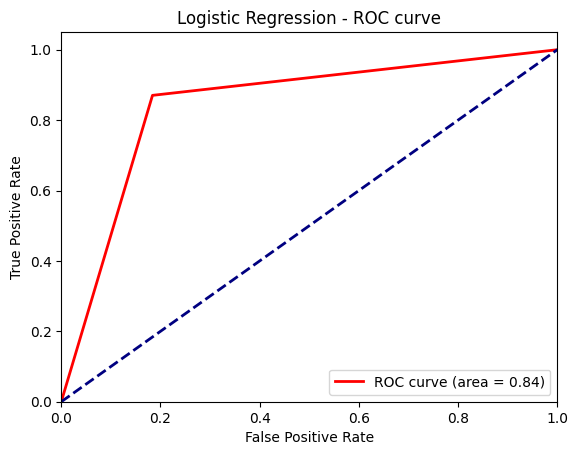

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
y_score = logistic_model.predict(scaled_x_test)
n_classes=len(y_score)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], threshold = roc_curve(scaled_y_test, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="red",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression - ROC curve")
plt.legend(loc="lower right")
plt.show()